In [4]:
import json
import os

# Define the file path
file_path = "/Users/garn195/Project Repositories/PauliTrans/Benchmarking_Stats/circuit_stats.json"

# Define the keys you want to import
keys = ["proc time", "opt time", "num_qubits", "raw T gates", "optimized T gates", "optimize iteration", 
        "optimize T ratio", "raw layer", "optimized layers", "optimized layer ratio", 
        "raw weights", "optimized weights"]

# Dictionary to store the filtered data
python_data = {}

# Load the JSON data from the file
if os.path.exists(file_path):
    with open(file_path, "r") as file:
        full_data = json.load(file)

    # Filter the data based on the keys
    for filename, stats in full_data.items():
        filtered_stats = {key: stats[key] for key in keys if key in stats}
        python_data[filename+".txt"] = filtered_stats

    print("Filtered data successfully loaded.")
else:
    print(f"File {file_path} not found!")

print(python_data)


Filtered data successfully loaded.
{'multiplier_n15.txt': {'proc time': 0.02665802900082781, 'opt time': 0.06941125600133091, 'num_qubits': 15, 'raw T gates': 144, 'optimized T gates': 42, 'optimize iteration': 2, 'optimize T ratio': 0.7083333333333334, 'raw layer': 8, 'optimized layers': 8, 'optimized layer ratio': 0.0, 'raw weights': 1.9166666666666667, 'optimized weights': 3.8095238095238093}, 'multiplier_n45.txt': {'proc time': 0.1591828450000321, 'opt time': 2.961548686998867, 'num_qubits': 45, 'raw T gates': 1512, 'optimized T gates': 396, 'optimize iteration': 2, 'optimize T ratio': 0.7380952380952381, 'raw layer': 128, 'optimized layers': 128, 'optimized layer ratio': 0.0, 'raw weights': 1.9404761904761905, 'optimized weights': 4.383838383838384}}


In [5]:
folder_path = "/Users/garn195/Project Repositories/NWQ-Sim/stabilizer/stab_T_bench"  # Folder containing text files
keys = ["proc time", "opt time", "raw T gates", "optimized T gates", "optimize iteration", "total gates"]
stab_data = {}
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(folder_path, filename)

        with open(file_path, "r") as file:
            lines = [line.strip() for line in file]

        if len(lines) != len(keys):
            raise ValueError(f"File {filename} does not match expected number of lines!")

        stab_data[filename] = dict(zip(keys, lines))

print(stab_data)

{'multiplier_n15.txt': {'proc time': '0.001217', 'opt time': '0.001943', 'raw T gates': '144', 'optimized T gates': '42', 'optimize iteration': '2', 'total gates': '454'}, 'adder_n4.txt': {'proc time': '5e-05', 'opt time': '1.7e-05', 'raw T gates': '4', 'optimized T gates': '4', 'optimize iteration': '1', 'total gates': '25'}, 'multiplier_n45.txt': {'proc time': '0.073921', 'opt time': '0.22876', 'raw T gates': '1512', 'optimized T gates': '396', 'optimize iteration': '2', 'total gates': '4574'}, 'adder_n10.txt': {'proc time': '0.00058', 'opt time': '0.00088', 'raw T gates': '88', 'optimized T gates': '48', 'optimize iteration': '2', 'total gates': '189'}, 'qft_n18_iter2.txt': {'proc time': '1.94885', 'opt time': '10.0613', 'raw T gates': '14383', 'optimized T gates': '11463', 'optimize iteration': '2', 'total gates': '27292'}, 'qft_n18_iter3.txt': {'proc time': '88.1671', 'opt time': '389.964', 'raw T gates': '98017', 'optimized T gates': '72501', 'optimize iteration': '2', 'total gat

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Custom labels and matching keys
import matplotlib.pyplot as plt
import numpy as np

# Custom labels and matching keys
keys = ['adder_n4.txt', 'adder_n10.txt', 'qft_n18_iter1.txt', 'qft_n18_iter2.txt', 'multiplier_n15.txt', 'multiplier_n45.txt']
labels = ['Adder\n(4q)', 'Adder\n(10q)', 'QFT\n(18q)\n(1 S-K Iteration)', 'QFT\n(18q)\n(2 S-K Iterations)', 'Multiplier\n(15q)', 'Multiplier\n(45q)']

# Extract and compute total times
total_times_stab = [float(stab_data[key]['proc time']) + float(stab_data[key]['opt time']) for key in keys]
total_times_python = [float(python_data[key]['proc time']) + float(python_data[key]['opt time']) for key in keys]

# Sort data based on total STABSim time
sorted_indices = np.argsort(total_times_stab)
sorted_labels = [labels[i] for i in sorted_indices]
sorted_total_times_stab = [total_times_stab[i] for i in sorted_indices]
sorted_total_times_python = [total_times_python[i] for i in sorted_indices]

x = np.arange(len(sorted_labels))

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, sorted_total_times_stab, marker='o', linestyle='-', color='blue', label='Total Time - STABSim')
ax.plot(x, sorted_total_times_python, marker='s', linestyle='-', color='red', label='Total Time - Python')

ax.set_ylabel('Processing + Optimization Time (seconds)')
ax.set_title('T-Transpilation Time by Circuit')
ax.set_xticks(x)
# ax.set_yscale('log')
ax.set_xticklabels(sorted_labels, rotation=30, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


# Extract and compute total times
times = [(key, label, 
          float(stab_data[key]['proc time']), 
          float(stab_data[key]['opt time']),
          float(python_data[key]['proc time']), 
          float(python_data[key]['opt time']), 
          ) 
         for key, label in zip(keys, labels)]

# Sort by total (proc + opt) time (Python)
times.sort(key=lambda x: x[2] + x[3])  

# Unpack sorted data
sorted_keys, sorted_labels, proc_times1, opt_times1, proc_times2, opt_times2 = zip(*times)

x = np.arange(len(sorted_labels))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, proc_times1, width, label='Proc Time - STABSim', color='blue')
ax.bar(x - width, opt_times1, width, bottom=proc_times1, label='Opt Time - STABSim', color='lightblue')
ax.bar(x + width, proc_times2, width, label='Processing Time - Python', color='red')
ax.bar(x + width, opt_times2, width, bottom=proc_times2, label='Opt Time - Python', color='salmon')

# proc_times1_log = np.log10(proc_times1)
# opt_times1_log = np.log10(opt_times1)
# proc_times2_log = np.log10(proc_times2)
# opt_times2_log = np.log10(opt_times2)

# ax.bar(x - width, proc_times1_log, width, label='Proc Time - STABSim', color='blue')
# ax.bar(x - width, opt_times1_log, width, bottom=proc_times1_log, label='Opt Time - STABSim', color='lightblue')

# ax.bar(x + width, proc_times2_log, width, label='Proc Time - Python', color='red')
# ax.bar(x + width, opt_times2_log, width, bottom=proc_times2_log, label='Opt Time - Python', color='salmon')

ax.set_ylabel('Transpilation Time (seconds)')
ax.set_title('Processing and Optimization Times')
ax.set_xticks(x)
ax.set_yscale('log')
ax.set_xticklabels(labels, rotation=30, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

KeyError: 'adder_n4.txt'

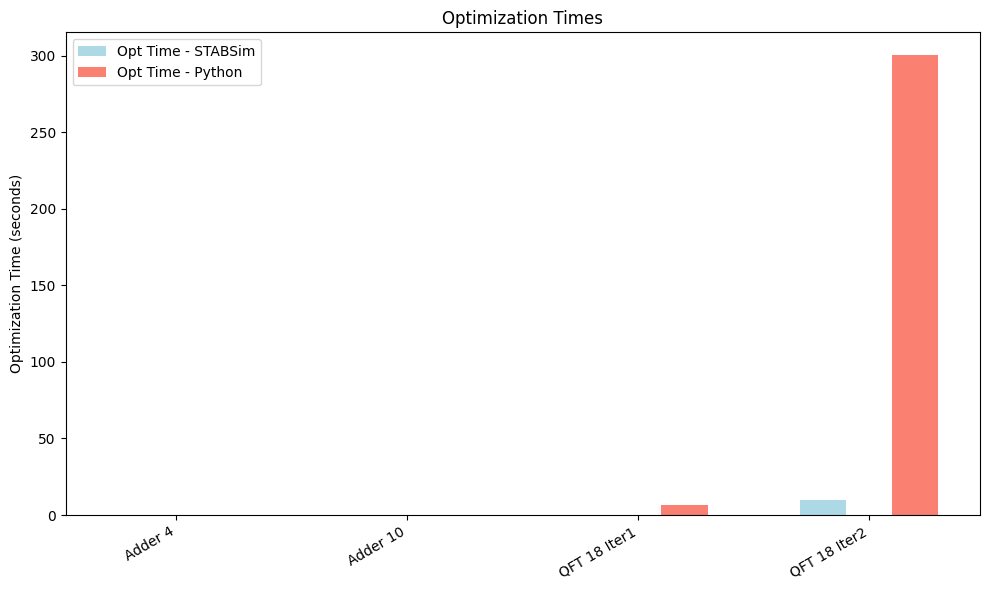

In [ ]:
labels = ['Adder\n(4q)', 'Adder\n(10q)', 'QFT\n(18q)\n(1 S-K Iteration)', 'QFT\n(18q)\n(2 S-K Iterations)', 'Multiplier\n(15q)', 'Multiplier\n(45q)']
#  Plot only optimization times
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, opt_times1, width, label='Opt Time - STABSim', color='lightblue')
ax.bar(x + width, opt_times2, width, label='Opt Time - Python', color='salmon')

ax.set_ylabel('Optimization Time (seconds)')
ax.set_title('Optimization Times')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=30, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

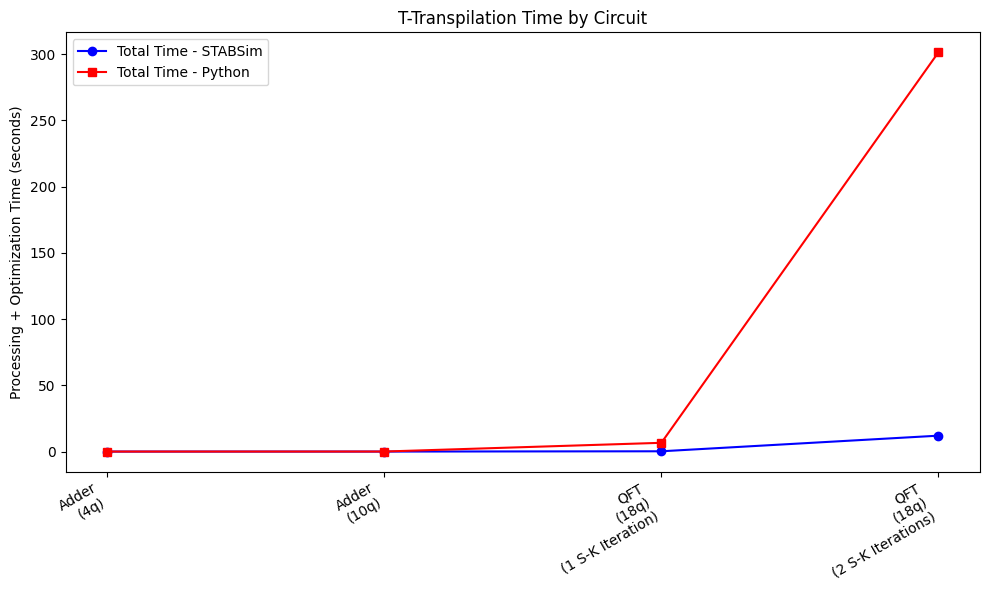

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Custom labels and matching keys
keys = ['adder_n4.txt', 'adder_n10.txt', 'qft_n18_iter1.txt', 'qft_n18_iter2.txt', 'multiplier_n15.txt', 'multiplier_n45.txt']
labels = ['Adder\n(4q)', 'Adder\n(10q)', 'QFT\n(18q)\n(1 S-K Iteration)', 'QFT\n(18q)\n(2 S-K Iterations)', 'Multiplier\n(15q)', 'Multiplier\n(45q)']

# Extract and compute total times
total_times_stab = [float(stab_data[key]['proc time']) + float(stab_data[key]['opt time']) for key in keys]
total_times_python = [float(python_data[key]['proc time']) + float(python_data[key]['opt time']) for key in keys]

# Sort data based on total STABSim time
sorted_indices = np.argsort(total_times_stab)
sorted_labels = [labels[i] for i in sorted_indices]
sorted_total_times_stab = [total_times_stab[i] for i in sorted_indices]
sorted_total_times_python = [total_times_python[i] for i in sorted_indices]

x = np.arange(len(sorted_labels))

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, sorted_total_times_stab, marker='o', linestyle='-', color='blue', label='Total Time - STABSim')
ax.plot(x, sorted_total_times_python, marker='s', linestyle='-', color='red', label='Total Time - Python')

ax.set_ylabel('Processing + Optimization Time (seconds)')
ax.set_title('T-Transpilation Time by Circuit')
ax.set_xticks(x)
# ax.set_yscale('log')
ax.set_xticklabels(sorted_labels, rotation=30, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


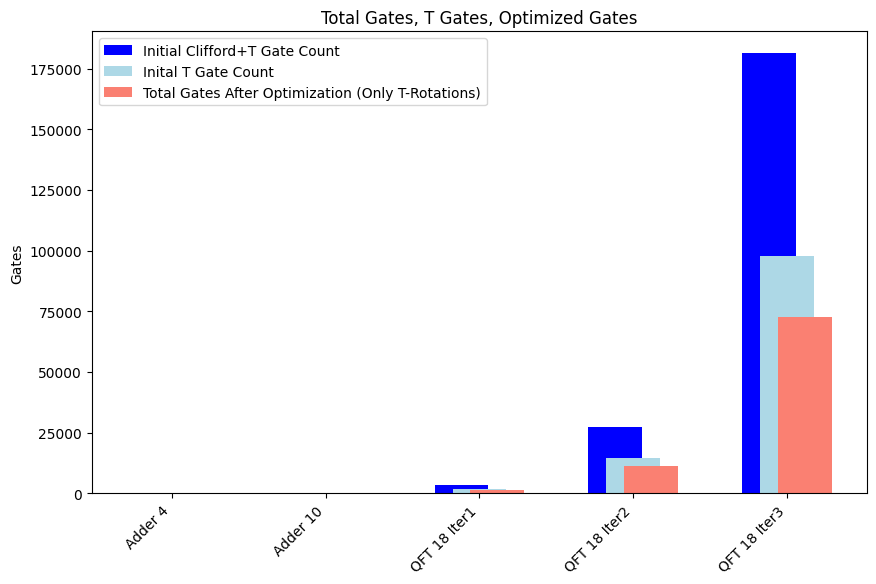

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

keys = ['adder_n10.txt', 'adder_n4.txt', 'qft_n18_iter1.txt','qft_n18_iter2.txt','qft_n18_iter3.txt']
labels = ['Adder 4', 'Adder 10', 'QFT 18 Iter1', 'QFT 18 Iter2', 'QFT 18 Iter3']

total_gates = [float(item['total gates']) for item in stab_data.values()]
raw_t_gates = [float(item['raw T gates']) for item in stab_data.values()]
optimized_t_gates = [float(item['optimized T gates']) for item in stab_data.values()]


sorted_indices = np.argsort(total_gates)

sorted_total_gates = np.array(total_gates)[sorted_indices]
sorted_raw_t_gates = np.array(raw_t_gates)[np.argsort(raw_t_gates)]
sorted_optimized_t_gates = np.array(optimized_t_gates)[np.argsort(optimized_t_gates)]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

bars0 = ax.bar(x - width/3, sorted_total_gates, width, label='Initial Clifford+T Gate Count', color="blue")
bars1 = ax.bar(x, sorted_raw_t_gates, width, label='Inital T Gate Count', color="lightblue")
bars2 = ax.bar(x + width/3, sorted_optimized_t_gates, width, label='Total Gates After Optimization (Only T-Rotations)', color="salmon")

ax.set_ylabel('Gates')
ax.set_title('Total Gates, T Gates, Optimized Gates')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha="right") 
ax.legend()
